In [1]:
#using Revise
addprocs(4)
using CMDPs
using POMDPs, POMDPToolbox, POMDPModels, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = MountainCar()
b = DPWBandit(mdp)
solver = ModularSolver(mdp, b)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

(-0.5, 0.0)

In [4]:
hr = HistoryRecorder(; max_steps=10, rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

In [5]:
h.state_hist

11-element Array{Tuple{Float64,Float64},1}:
 (-0.5, 0.0)              
 (-0.499177, 0.000823157) 
 (-0.497537, 0.00164016)  
 (-0.495092, 0.00244489)  
 (-0.49286, 0.00223135)   
 (-0.491859, 0.00100114)  
 (-0.492096, -0.000236549)
 (-0.493568, -0.00147247) 
 (-0.495266, -0.00169739) 
 (-0.496175, -0.000909636)
 (-0.49729, -0.00111508)  

In [6]:
h.action_hist

10-element Array{Float64,1}:
  1.0
  1.0
  1.0
  0.0
 -1.0
 -1.0
 -1.0
  0.0
  1.0
  0.0

In [7]:
h.reward_hist

10-element Array{Float64,1}:
 -1.0     
 -0.999177
 -0.997537
 -0.995092
 -0.99286 
 -0.991859
 -0.992096
 -0.993568
 -0.995266
 -0.996175

In [8]:
## Study

In [18]:
study = RewardvsN(; mdp=MountainCar(), n_seeds=5, n_iters=[100, 500, 1000, 2000, 5000, 10000], max_steps=20)

CMDPs.RewardvsN
  mdp: POMDPModels.MountainCar
  bandits: Array{DataType}((1,))
  n_seeds: Int64 5
  n_iters: Array{Int64}((6,)) [100, 500, 1000, 2000, 5000, 10000]
  max_steps: Int64 20


In [19]:
result = run_study(study)

CMDPs.RewardvsNResult("Mountain Car", 30×4 DataFrames.DataFrame
│ Row │ alg            │ seed │ n_iters │ r_total  │
├─────┼────────────────┼──────┼─────────┼──────────┤
│ 1   │ MCTS.DPWBandit │ 1    │ 100     │ -19.5268 │
│ 2   │ MCTS.DPWBandit │ 2    │ 100     │ -19.7201 │
│ 3   │ MCTS.DPWBandit │ 3    │ 100     │ -19.5467 │
│ 4   │ MCTS.DPWBandit │ 4    │ 100     │ -19.909  │
│ 5   │ MCTS.DPWBandit │ 5    │ 100     │ -19.4599 │
│ 6   │ MCTS.DPWBandit │ 1    │ 500     │ -19.3128 │
│ 7   │ MCTS.DPWBandit │ 2    │ 500     │ -19.4007 │
│ 8   │ MCTS.DPWBandit │ 3    │ 500     │ -19.3096 │
│ 9   │ MCTS.DPWBandit │ 4    │ 500     │ -19.2866 │
│ 10  │ MCTS.DPWBandit │ 5    │ 500     │ -19.4763 │
│ 11  │ MCTS.DPWBandit │ 1    │ 1000    │ -19.3072 │
⋮
│ 19  │ MCTS.DPWBandit │ 4    │ 2000    │ -19.0554 │
│ 20  │ MCTS.DPWBandit │ 5    │ 2000    │ -19.2325 │
│ 21  │ MCTS.DPWBandit │ 1    │ 5000    │ -19.2203 │
│ 22  │ MCTS.DPWBandit │ 2    │ 5000    │ -19.1314 │
│ 23  │ MCTS.DPWBandit │ 3    │ 5

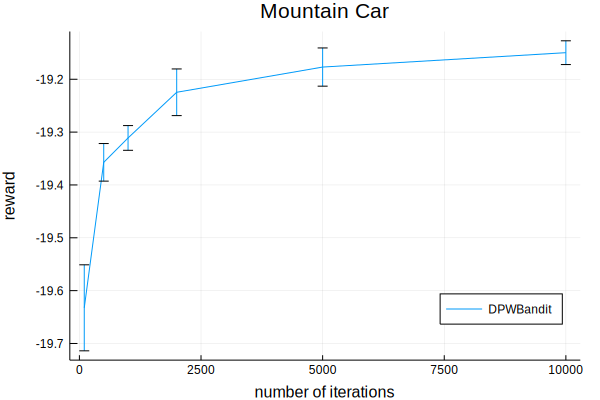

In [20]:
Plots.plot(result)